# Chapter 8: Integration

Robert Johansson

Source code listings for [Numerical Python - Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib](https://www.apress.com/us/book/9781484242452) (ISBN 978-1-484242-45-2).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'

In [2]:
import numpy as np

In [3]:
from scipy import integrate

In [4]:
import sympy
import mpmath

In [5]:
sympy.init_printing()

# Simpson's rule

In [6]:
a, b, X = sympy.symbols("a, b, x")
f = sympy.Function("f")

In [7]:
#x = a, (a+b)/3, 2 * (a+b)/3, b # 3rd order quadrature rule
x = a, (a+b)/2, b # simpson's rule
#x = a, b # trapezoid rule
#x = ((b+a)/2,)  # mid-point rule

In [8]:
w = [sympy.symbols("w_%d" % i) for i in range(len(x))] 

In [9]:
q_rule = sum([w[i] * f(x[i]) for i in range(len(x))])

In [10]:
q_rule

In [11]:
phi = [sympy.Lambda(X, X**n) for n in range(len(x))]

In [12]:
phi

In [13]:
eqs = [q_rule.subs(f, phi[n]) - sympy.integrate(phi[n](X), (X, a, b)) for n in range(len(phi))]

In [14]:
eqs

In [15]:
w_sol = sympy.solve(eqs, w)

In [16]:
w_sol

In [17]:
q_rule.subs(w_sol).simplify()

## SciPy `integrate`

### Simple integration example

In [18]:
def f(x):
    return np.exp(-x**2)

In [19]:
val, err = integrate.quad(f, -1, 1)

In [20]:
val

In [21]:
err

In [22]:
val, err = integrate.quadrature(f, -1, 1)

In [23]:
val

In [24]:
err

### Extra arguments

In [25]:
def f(x, a, b, c):
    return a * np.exp(-((x-b)/c)**2)

In [26]:
val, err = integrate.quad(f, -1, 1, args=(1, 2, 3))

In [27]:
val

In [28]:
err

### Reshuffle arguments

In [29]:
from scipy.special import jv

In [30]:
val, err = integrate.quad(lambda x: jv(0, x), 0, 5)

In [31]:
val

In [32]:
err

### Infinite limits 

In [33]:
f = lambda x: np.exp(-x**2)

In [34]:
val, err = integrate.quad(f, -np.inf, np.inf)

In [35]:
val

In [36]:
err

### Singularity

In [37]:
f = lambda x: 1/np.sqrt(abs(x))

In [38]:
a, b = -1, 1

In [39]:
integrate.quad(f, a, b)

/Users/rob/miniconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [40]:
integrate.quad(f, a, b, points=[0])

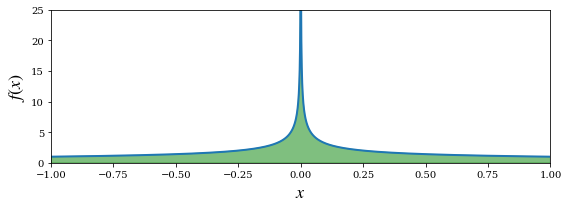

In [41]:
fig, ax = plt.subplots(figsize=(8, 3))

x = np.linspace(a, b, 10000)
ax.plot(x, f(x), lw=2)
ax.fill_between(x, f(x), color='green', alpha=0.5)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_ylim(0, 25)
ax.set_xlim(-1, 1)

fig.tight_layout()
fig.savefig("ch8-diverging-integrand.pdf")

## Tabulated integrand

In [42]:
f = lambda x: np.sqrt(x)

In [43]:
a, b = 0, 2

In [44]:
x = np.linspace(a, b, 25)

In [45]:
y = f(x)

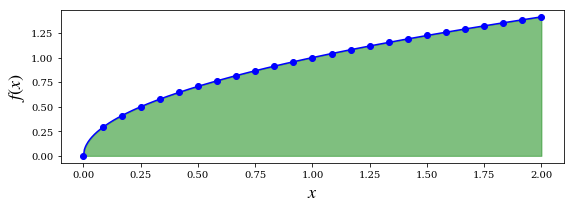

In [46]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x, y, 'bo')
xx = np.linspace(a, b, 500)
ax.plot(xx, f(xx), 'b-')
ax.fill_between(xx, f(xx), color='green', alpha=0.5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x)$", fontsize=18)
fig.tight_layout()
fig.savefig("ch8-tabulated-integrand.pdf")

In [47]:
val_trapz = integrate.trapz(y, x)

In [48]:
val_trapz

In [49]:
val_simps = integrate.simps(y, x)

In [50]:
val_simps

In [51]:
val_exact = 2.0/3.0 * (b-a)**(3.0/2.0)

In [52]:
val_exact

In [53]:
val_exact - val_trapz

In [54]:
val_exact - val_simps

In [55]:
x = np.linspace(a, b, 1 + 2**6)

In [56]:
len(x)

In [57]:
y = f(x)

In [58]:
val_exact - integrate.romb(y, dx=(x[1]-x[0]))

In [59]:
val_exact - integrate.simps(y, dx=x[1]-x[0])

## Higher dimension

In [60]:
def f(x):
    return np.exp(-x**2)

In [61]:
%time integrate.quad(f, a, b)

CPU times: user 160 µs, sys: 40 µs, total: 200 µs
Wall time: 214 µs


In [62]:
def f(x, y):
    return np.exp(-x**2-y**2)

In [63]:
a, b = 0, 1

In [64]:
g = lambda x: 0

In [65]:
h = lambda x: 1

In [66]:
integrate.dblquad(f, a, b, g, h)

In [67]:
integrate.dblquad(lambda x, y: np.exp(-x**2-y**2), 0, 1, lambda x: 0, lambda x: 1)

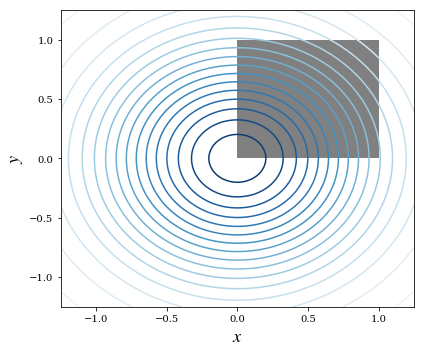

In [68]:
fig, ax = plt.subplots(figsize=(6, 5))

x = y = np.linspace(-1.25, 1.25, 75)
X, Y = np.meshgrid(x, y)

c = ax.contour(X, Y, f(X, Y), 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)

bound_rect = plt.Rectangle((0, 0), 1, 1,
                           facecolor="grey")
ax.add_patch(bound_rect)

ax.axis('tight')
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$y$', fontsize=18)

fig.tight_layout()
fig.savefig("ch8-multi-dim-integrand.pdf")

In [69]:
integrate.dblquad(f, 0, 1, lambda x: -1 + x, lambda x: 1 - x)

In [70]:
def f(x, y, z):
    return np.exp(-x**2-y**2-z**2)

In [71]:
integrate.tplquad(f, 0, 1, lambda x : 0, lambda x : 1, lambda x, y : 0, lambda x, y : 1)

In [72]:
integrate.nquad(f, [(0, 1), (0, 1), (0, 1)])

### nquad

In [73]:
def f(*args):
    return  np.exp(-np.sum(np.array(args)**2))

In [74]:
%time integrate.nquad(f, [(0,1)] * 1)

CPU times: user 677 µs, sys: 79 µs, total: 756 µs
Wall time: 767 µs


In [75]:
%time integrate.nquad(f, [(0,1)] * 2)

CPU times: user 8.53 ms, sys: 690 µs, total: 9.22 ms
Wall time: 8.75 ms


In [76]:
%time integrate.nquad(f, [(0,1)] * 3)

CPU times: user 169 ms, sys: 3.38 ms, total: 172 ms
Wall time: 171 ms


In [77]:
%time integrate.nquad(f, [(0,1)] * 4)

CPU times: user 3.31 s, sys: 14.7 ms, total: 3.32 s
Wall time: 3.32 s


In [78]:
%time integrate.nquad(f, [(0,1)] * 5)

CPU times: user 1min 9s, sys: 237 ms, total: 1min 9s
Wall time: 1min 9s


### Monte Carlo integration

In [80]:
from skmonaco import mcquad

In [81]:
%time val, err = mcquad(f, xl=np.zeros(5), xu=np.ones(5), npoints=100000)

CPU times: user 2.01 s, sys: 160 ms, total: 2.17 s
Wall time: 2.05 s


In [82]:
val, err

In [83]:
%time val, err = mcquad(f, xl=np.zeros(10), xu=np.ones(10), npoints=100000)

CPU times: user 1.93 s, sys: 101 ms, total: 2.03 s
Wall time: 1.96 s


In [84]:
val, err

## Symbolic and multi-precision quadrature

In [85]:
x = sympy.symbols("x")

In [86]:
f = 2 * sympy.sqrt(1-x**2)

In [87]:
a, b = -1, 1

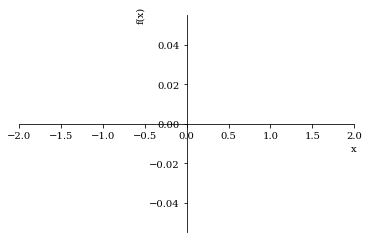

In [88]:
sympy.plot(f, (x, -2, 2));

In [89]:
val_sym = sympy.integrate(f, (x, a, b))

In [90]:
val_sym

In [91]:
mpmath.mp.dps = 75

In [92]:
f_mpmath = sympy.lambdify(x, f, 'mpmath')

In [93]:
val = mpmath.quad(f_mpmath, (a, b))

In [94]:
sympy.sympify(val)

In [95]:
sympy.N(val_sym, mpmath.mp.dps+1) - val

In [96]:
%timeit mpmath.quad(f_mpmath, [a, b])

7.26 ms ± 82.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [97]:
f_numpy = sympy.lambdify(x, f, 'numpy')

In [98]:
%timeit integrate.quad(f_numpy, a, b)

1.22 ms ± 19.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### double and triple integrals

In [99]:
def f2(x, y):
    return np.cos(x)*np.cos(y)*np.exp(-x**2-y**2)

def f3(x, y, z):
    return np.cos(x)*np.cos(y)*np.cos(z)*np.exp(-x**2-y**2-z**2)

In [100]:
integrate.dblquad(f2, 0, 1, lambda x : 0, lambda x : 1)

In [101]:
integrate.tplquad(f3, 0, 1, lambda x : 0, lambda x : 1, lambda x, y : 0, lambda x, y : 1)

In [102]:
x, y, z = sympy.symbols("x, y, z")

In [103]:
f2 = sympy.cos(x)*sympy.cos(y)*sympy.exp(-x**2-y**2)

In [104]:
f3 = sympy.cos(x)*sympy.cos(y)*sympy.cos(z) * sympy.exp(-x**2 - y**2 - z**2)

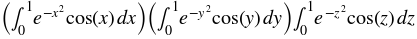

In [105]:
sympy.integrate(f3, (x, 0, 1), (y, 0, 1), (z, 0, 1))  # this does not succeed

In [106]:
f2_numpy = sympy.lambdify((x, y), f2, 'numpy')

In [107]:
integrate.dblquad(f2_numpy, 0, 1, lambda x: 0, lambda x: 1)

In [108]:
f3_numpy = sympy.lambdify((x, y, z), f3, 'numpy')

In [109]:
integrate.tplquad(f3_numpy, 0, 1, lambda x: 0, lambda x: 1, lambda x, y: 0, lambda x, y: 1)

In [110]:
mpmath.mp.dps = 30

In [111]:
f2_mpmath = sympy.lambdify((x, y), f2, 'mpmath')

In [112]:
res = mpmath.quad(f2_mpmath, (0, 1), (0, 1))
res

mpf('0.430564794306099099242308990195783')

In [113]:
f3_mpmath = sympy.lambdify((x, y, z), f3, 'mpmath')

In [114]:
res = mpmath.quad(f3_mpmath, (0, 1), (0, 1), (0, 1))

In [115]:
sympy.sympify(res)

In [116]:
%time res = sympy.sympify(mpmath.quad(f3_mpmath, (0, 1), (0, 1), (0, 1)))

CPU times: user 2min 44s, sys: 294 ms, total: 2min 44s
Wall time: 2min 44s


## Line integrals

In [117]:
t, x, y = sympy.symbols("t, x, y")

In [118]:
C = sympy.Curve([sympy.cos(t), sympy.sin(t)], (t, 0, 2 * sympy.pi))

In [119]:
sympy.line_integrate(1, C, [x, y])

In [120]:
sympy.line_integrate(x**2 * y**2, C, [x, y])

## Integral transformations

### Laplace transforms

In [121]:
s = sympy.symbols("s")

In [122]:
a, t = sympy.symbols("a, t", positive=True)

In [123]:
f = sympy.sin(a*t)

In [124]:
sympy.laplace_transform(f, t, s)

In [125]:
F = sympy.laplace_transform(f, t, s, noconds=True)

In [126]:
F

In [127]:
sympy.inverse_laplace_transform(F, s, t, noconds=True)

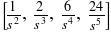

In [128]:
[sympy.laplace_transform(f, t, s, noconds=True) for f in [t, t**2, t**3, t**4]]

In [129]:
n = sympy.symbols("n", integer=True, positive=True)

In [130]:
sympy.laplace_transform(t**n, t, s, noconds=True)

In [131]:
sympy.laplace_transform((1 - a*t) * sympy.exp(-a*t), t, s, noconds=True)

### Fourier Transforms

In [132]:
w = sympy.symbols("omega")

In [133]:
f = sympy.exp(-a*t**2)

In [134]:
F = sympy.fourier_transform(f, t, w)

In [135]:
F

In [136]:
sympy.inverse_fourier_transform(F, w, t)

In [137]:
sympy.fourier_transform(sympy.cos(t), t, w)  # not good

## Versions

In [138]:
%reload_ext version_information

In [139]:
%version_information numpy, matplotlib, scipy, sympy, mpmath, skmonaco

Software versions
Python 3.6.8 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.5.0
OS Darwin 18.2.0 x86_64 i386 64bit
numpy 1.16.3
matplotlib 3.0.3
scipy 1.2.1
sympy 1.4
mpmath 1.1.0
skmonaco 0.2.1
Mon May 06 14:55:36 2019 JST